In [2]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir("../image classification"))

['.ipynb_checkpoints', 'dogs-vs-cats.zip', 'sampleSubmission.csv', 'test1', 'test1.zip', 'train', 'train.zip', 'Untitled.ipynb']


In [23]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [24]:
filenames=os.listdir("../image classification/train")
filenames=filenames[12400:12600]
categories=[]
for filename in filenames:
    category=filename.split(".")[0]
    if category == "dog":
        categories.append(1)
    else:
        categories.append(0)
df = pd.DataFrame({"filename":filenames,"category":categories})

In [25]:
df.head()

,filename,category
0,cat.9909.jpg,0
1,cat.991.jpg,0
2,cat.9910.jpg,0
3,cat.9911.jpg,0
4,cat.9912.jpg,0


In [26]:
df.tail()

,filename,category
195,dog.10082.jpg,1
196,dog.10083.jpg,1
197,dog.10084.jpg,1
198,dog.10085.jpg,1
199,dog.10086.jpg,1


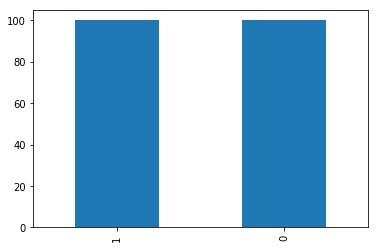

In [27]:
df["category"].value_counts().plot.bar()

In [35]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_9 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)       

In [39]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
earlystop=EarlyStopping(patience=10)

In [40]:
learning_rate_reduction = ReduceLROnPlateau(monitor="val_acc",patience=2,verbose=1,factor=0.5,min_lr=0.00001)

In [41]:
callback=[earlystop,learning_rate_reduction]

In [42]:
df["category"]=df["category"].replace({0:"cat",1:"dog"})

In [44]:
train_df,validate_df=train_test_split(df,test_size=0.20,random_state=42)
train_df=train_df.reset_index(drop=True)
validate_df=validate_df.reset_index(drop=True)

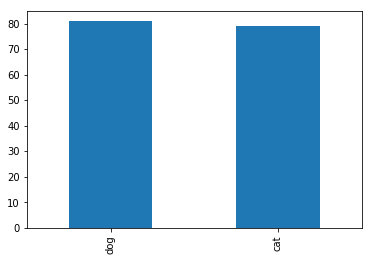

In [46]:
train_df["category"].value_counts().plot.bar()

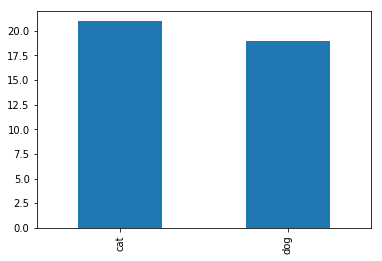

In [47]:
validate_df["category"].value_counts().plot.bar()

In [51]:
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [54]:
train_datagen=ImageDataGenerator(rotation_range=1,rescale=1./255,shear_range=0.2,horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)
train_generator=train_datagen.flow_from_dataframe(train_df,"../image classification/train",x_col="filename",y_col="category",target_size=IMAGE_SIZE,class_mode="categorical",batch_size=15)

Found 160 validated image filenames belonging to 2 classes.


In [60]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator=validation_datagen.flow_from_dataframe(validate_df,"../image classification/train",x_col="filename",y_col="category",target_size=IMAGE_SIZE,class_mode="categorical",batch_size=15)

Found 40 validated image filenames belonging to 2 classes.


In [62]:
epochs=3 if FAST_RUN else 50
history=model.fit_generator(train_generator,epochs=epochs,validation_data=validation_generator,validation_steps=total_validate//batch_size,steps_per_epoch=total_train//batch_size, callbacks=callback)

Epoch 1/50
10/10 [==============================] - 33s 3s/step - loss: 2.4361 - accuracy: 0.4621 - val_loss: 0.8794 - val_accuracy: 0.3667
Epoch 2/50


C:\Users\Adil Shagoo\AppData\Roaming\Python\Python36\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10/10 [==============================] - 26s 3s/step - loss: 1.2416 - accuracy: 0.5931 - val_loss: 0.6782 - val_accuracy: 0.3600
Epoch 3/50
10/10 [==============================] - 26s 3s/step - loss: 1.3276 - accuracy: 0.5800 - val_loss: 0.7475 - val_accuracy: 0.4800
Epoch 4/50
10/10 [==============================] - 26s 3s/step - loss: 0.9230 - accuracy: 0.6897 - val_loss: 0.7012 - val_accuracy: 0.6000
Epoch 5/50
10/10 [==============================] - 25s 3s/step - loss: 1.2531 - accuracy: 0.5643 - val_loss: 0.6992 - val_accuracy: 0.5600
Epoch 6/50
10/10 [==============================] - 27s 3s/step - loss: 1.0839 - accuracy: 0.6138 - val_loss: 1.1644 - val_accuracy: 0.5200
Epoch 7/50
10/10 [==============================] - 26s 3s/step - loss: 0.8475 - accuracy: 0.7103 - val_loss: 1.7691 - val_accuracy: 0.4667
Epoch 8/50
10/10 [==============================] - 26s 3s/step - loss: 0.7467 - accuracy: 0.6867 - val_loss: 1.9980 - val_accuracy: 0.6000
Epoch 9/50
10/10 [=============

In [63]:
model.save_weights("model.h5")

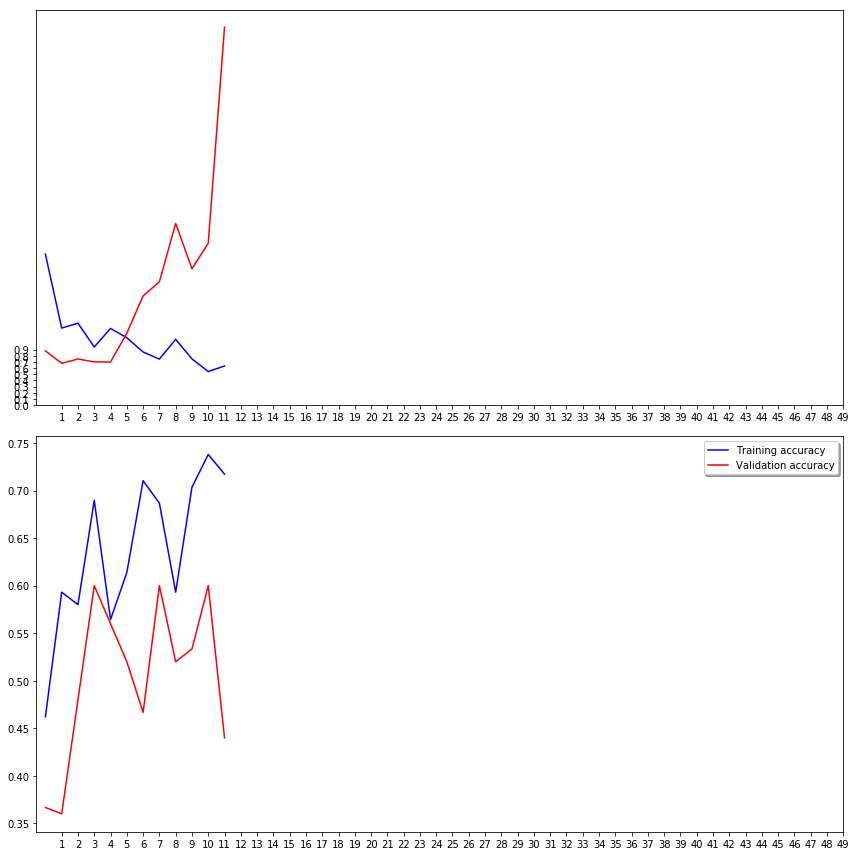

In [67]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()


In [73]:
test_filenames = os.listdir("../image classification/test1")
test_filenames=test_filenames[:100]
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [74]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "../image classification/test1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 100 validated image filenames.


In [75]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [76]:
test_df['category'] = np.argmax(predict, axis=-1)

In [77]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [78]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

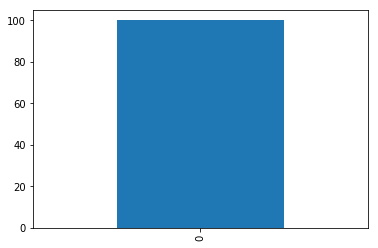

In [79]:
test_df['category'].value_counts().plot.bar()

In [83]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)